# Analysing Lidar Data 

Raw data obtained from this <a href='https://ndownloader.figshare.com/files/12395030'>link</a> and contents extracted into the folder `./data`

**Aims:** 

* Analyse LIDAR data to create a digital elevation model for the surroundings of Boulder, CO prior to the 2013 flood.
* Construct and visualise a Canopy Height Model for the surroundings of Boulder, CO prior to the 2013 flood.

First import the python packages that will be used in this notebook.



In [1]:
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from scipy.stats import zscore

Read the raster file containing the data. Code snippet source from <a href='https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/open-lidar-raster-python/'>here</a>.

In [2]:
with rio.open('../data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dem_im = src.read(masked=True)
    # Create a spatial extent object using rio.plot.plotting
    dem_spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    dem_bounds = src.bounds
    
    # Determine Coordinate Reference System (CRS):
    dem_crs = src.crs
    
    # Determine the resolution of the LIDAR image:
    dem_resolution = src.res 
    
    # Meta data
    dem_meta = src.meta

The type of the object `lidar_dem_im` is:

In [3]:
type(lidar_dem_im)

numpy.ma.core.MaskedArray

The CRS of the raster data is:

In [4]:
dem_crs

CRS.from_dict(init='epsg:32613')

The resolution of the LIDAR image is:

In [5]:
dem_resolution

(1.0, 1.0)

This means that each elevation pixel corresponds to a 1m x 1m square.

The shape of the object `lidar_dem_im` is: 

In [6]:
lidar_dem_im.shape

(1, 2000, 4000)

Reshape the array to remove the superfluous dimension. 

In [7]:
lidar_dem_im = lidar_dem_im.reshape(2000,4000)

Plot the LIDAR image data using code from <a href='https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/open-lidar-raster-python/'>here</a>.

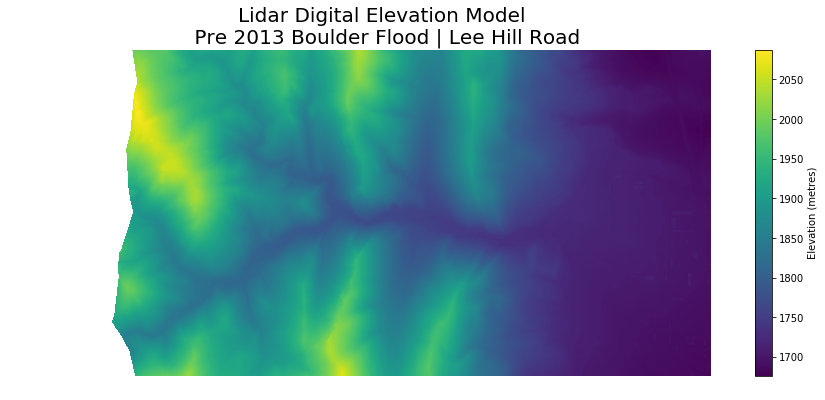

In [8]:
fig, ax = plt.subplots(figsize = (16,6))
lidar_plot = ax.imshow(lidar_dem_im, 
                       cmap='viridis', 
                       extent=dem_spatial_extent)
ax.set_title("Lidar Digital Elevation Model \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize= 20)
fig.colorbar(lidar_plot, label='Elevation (metres)')
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

### Plotting the distribution of elevations

The aim is to plot a distribution of the elevations to further understand the data. In order to do this, `None` values need to be removed. First, flatten the `lidar_dem_im` image data into an array and then turn it into a list.

In [9]:
elevations = lidar_dem_im.ravel().tolist()

Filter out the `None` data in the `elevations` list.

In [10]:
elevations = [e for e in elevations if e is not None]

Use seaborn to plot a histogram of these elevation values.

/home/david/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


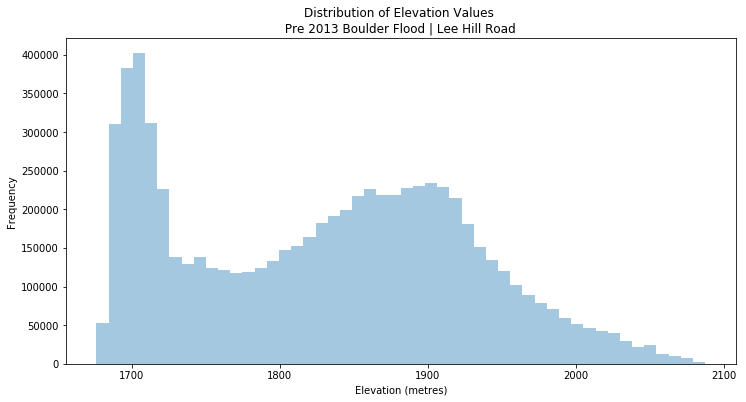

In [11]:
plt.figure(figsize=(12, 6));
sns.distplot(elevations, kde=False)

plt.xlabel('Elevation (metres)')
plt.ylabel('Frequency')
plt.title('Distribution of Elevation Values \n Pre 2013 Boulder Flood | Lee Hill Road ');

## Analysing the Coordinate Reference System (CRS)

The coordinate reference system that is being used is:


In [12]:
dem_crs

CRS.from_dict(init='epsg:32613')

Information about this CRS system can be found on the <a href='https://www.spatialreference.org/ref/epsg/32613/spatial'>spatial reference website</a>.

## Importing Digital Surface Model (DSM)

The digital surface model contains measurements of the actual surface and as such, includes trees, buildings etc. It is loaded below.

In [13]:
with rio.open('../data/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif') as src:
    # Convert / read the data into a numpy array:
    lidar_dsm_im = src.read(masked=True)
    # Create a spatial extent object using rio.plot.plotting
    dsm_spatial_extent = rio.plot.plotting_extent(src)
    # Get bounds of object
    dsm_bounds = src.bounds
    
    # Determine Coordinate Reference System (CRS):
    dsm_crs = src.crs
    
    # Determine the resolution of the LIDAR image:
    dsm_resolution = src.res 
    
    # Meta-data
    dsm_meta = src.meta

Check the dimensions of the model.

In [14]:
lidar_dsm_im.shape

(1, 2000, 4000)

Reshape the array:


In [15]:
lidar_dsm_im = lidar_dsm_im.reshape(2000,4000)

In [16]:
lidar_dsm_im.shape

(2000, 4000)

## Creating a Canopy Height Model (CHM)

A canopy height model shows the height of the canopy. It simply is the Digital Surface Model minus the Digital Elevation Model. First check if the parameters of both LIDAR images are the same.

In [17]:
assert dem_spatial_extent == dsm_spatial_extent
assert dem_bounds == dsm_bounds
assert dem_crs == dsm_crs
assert dem_resolution ==  dsm_resolution
assert lidar_dem_im.shape == lidar_dsm_im.shape

Create the Canopy Height Model:

In [18]:
lidar_chm_im = lidar_dsm_im - lidar_dem_im

Plot the CHM:

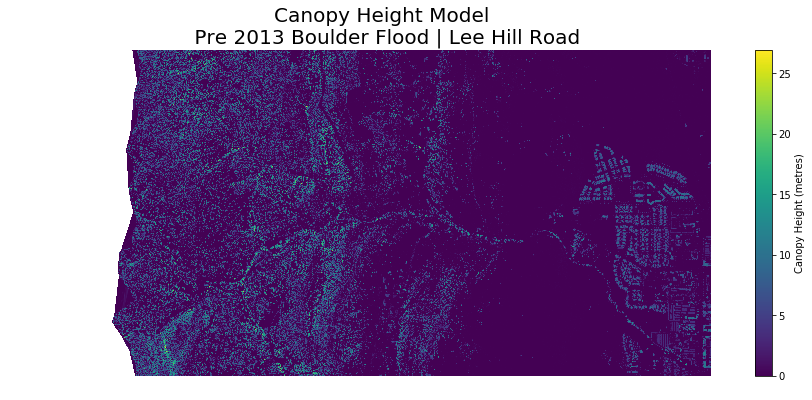

In [19]:
fig, ax = plt.subplots(figsize = (16,6))
lidar_plot = ax.imshow(lidar_chm_im, 
                       cmap='viridis',
                       extent=dem_spatial_extent)
ax.set_title("Canopy Height Model \n Pre 2013 Boulder Flood | Lee Hill Road", fontsize= 20)
fig.colorbar(lidar_plot, label='Canopy Height (metres)')
# turn off the x and y axes for prettier plotting
ax.set_axis_off()
plt.show()

### Plotting the distribution of heights in the Canopy Height Model

Flatten the `lidar_dem_im` image data into an array and then turn it into a list.

In [20]:
heights = lidar_chm_im.ravel().tolist()

Filter out the `None` data in the `heights` list and turn the list into a numpy array.

In [21]:
heights = [h for h in heights if h is not None]
heights = np.array(heights)

Use seaborn to plot a histogram of these elevation values.

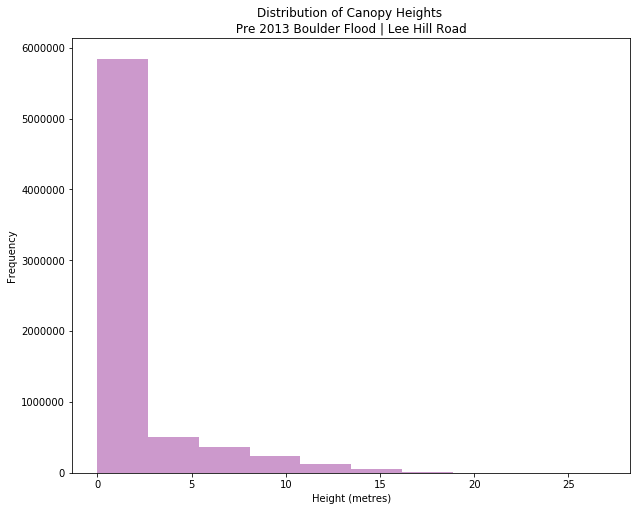

In [22]:
plt.figure(figsize=(10, 8));
sns.distplot(heights, kde=False, bins=10, color='purple')

plt.xlabel('Height (metres)')
plt.ylabel('Frequency')
plt.title('Distribution of Canopy Heights \n Pre 2013 Boulder Flood | Lee Hill Road ');

Plot a distribution of the heights that are above 20 metres.

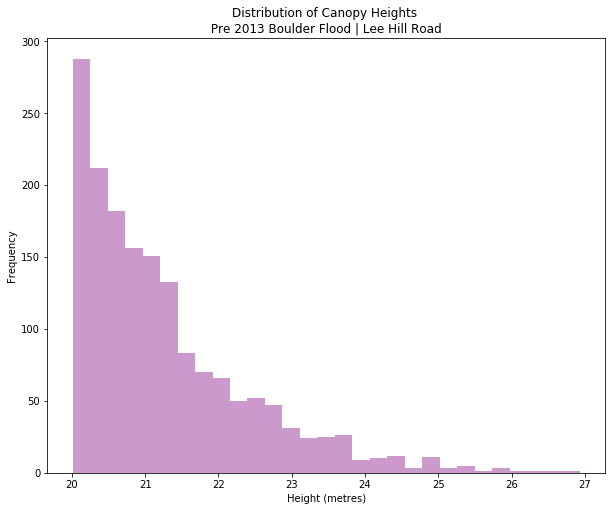

In [23]:
plt.figure(figsize=(10, 8));
sns.distplot(heights[heights>20], kde=False, color='purple')

plt.xlabel('Height (metres)')
plt.ylabel('Frequency')
plt.title('Distribution of Canopy Heights \n Pre 2013 Boulder Flood | Lee Hill Road ');

## Exporting the Canopy Height Model as a TIFF file

The meta data for the Canopy Height Model (CHM) will be the same as the meta data for both the DEM and DSM models. 

In [24]:
chm_meta = dem_meta

The TIFF file for the CHM can be created:

In [25]:
file_name = "./pre_chm.tiff"

with rio.open(file_name, 'w', **chm_meta) as outf:
    outf.write(lidar_chm_im, 1)
    outf.write_mask(lidar_chm_im.mask)